#### Import libraries

In [1]:
import pandas as pd
import geopandas as gpd
from census import Census
import matplotlib.pyplot as plt
import contextily as ctx
pd.options.display.max_columns =200

# Social Vulnerability Index for Mapping Community Health Worker Need

This notebook shows preliminary mapping of the CDC's [Social Vulnerability Index](https://svi.cdc.gov/). This index is built using American Community Survey 5 year estimates (2014-2018) and is comprised of four thematic categories. Multiple ACS variables are used within each thematic category:

#### Socioeconomic Status
- below poverty level
- unemployment
- median household income
- education level (no high school diploma)  

#### Household Composition and Disability
- number of residents >65
- number of residents > 17 years
- single parent households
- disability status

#### Minority Status and Language  
- non-white population
- language spoken (speaks english "less than well")  

#### Housing and Transportation  
- multi-unit housing
- mobile homes
- crowded living conditions
- no vehicle
- group quarters

Full documentation for 2018 data is available [here](https://svi.cdc.gov/data-and-tools-download.html).


### I. Importing SVI data and computing state percentile ranking

The CDC uses both a USA-wide percentile ranking and a state by state percentile ranking. For our project given that funding is likely going to be managed at a state level using a state percentile ranking makes the most sense and will be most sensitive to regional socioeconomic differences. What do others think?

In [2]:
# import SVI data
svi = gpd.read_file("data/svi/SVI2018_US_tract.geojson")
svi_tribal = gpd.read_file("data/svi/SVI2018_tribal_tract.geojson")
svi_puerto_rico = gpd.read_file("data/svi/SVI2018_PuertoRico_tract.geojson")

In [3]:
## add in puerto rico to USA-wide dataset
svi_pr = svi.append(svi_puerto_rico)

## select just locations with non-N/A values for 'SPL_THEMES' field
svi_pr_forRPL = svi_pr[svi_pr['SPL_THEMES'] != -999].copy()
svi_pr_forRPL_na = svi_pr[svi_pr['SPL_THEMES'] == -999].copy()

## calculate state percentile rank for combined svi variable
svi_pr_forRPL['RPL_ThemesStates'] = svi_pr_forRPL.groupby('STATE')['SPL_THEMES'].rank(pct=True)

## append no data values back to dataset for complete set
svi_states = svi_pr_forRPL.append(svi_pr_forRPL_na)

In [5]:
svi_states['RPL_Uninsur'] = svi_states.groupby('STATE')['EP_UNINSUR'].rank(pct=True)

In [6]:
# to export a csv: 
svi_states.to_csv("data/")

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,E_NOHSDP,M_NOHSDP,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_MINRTY,M_MINRTY,E_LIMENG,M_LIMENG,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV,MP_POV,EP_UNEMP,MP_UNEMP,EP_PCI,MP_PCI,EP_NOHSDP,MP_NOHSDP,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_MINRTY,MP_MINRTY,EP_LIMENG,MP_LIMENG,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV,EPL_UNEMP,EPL_PCI,EPL_NOHSDP,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,SPL_THEME2,RPL_THEME2,EPL_MINRTY,EPL_LIMENG,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV,F_UNEMP,F_PCI,F_NOHSDP,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_THEME2,F_MINRTY,F_LIMENG,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape_STAr,Shape_STLe,geometry,RPL_ThemesStates,RPL_Uninsur
609,01,ALABAMA,AL,01001,Autauga,01001020100,"Census Tract 201, Autauga County, Alabama",3.790677,1923,253,779,69,765,73,218,109,35,23,31580,5144,123,46,245,52,407,100,339,87,66,44.1,382,332.0,14,49.2,0,17.0,135,56,3,13.0,6,9,0,12,11.3,5.8,3.6,2.4,31580.0,5144.0,9.4,3.6,12.7,2.9,21.2,4.4,17.6,4.5,8.6,5.7,19.9,17.1,0.8,2.7,0.0,2.2,17.3,7.2,0.4,1.7,0.8,1.2,0.0,0.6,0.4701,0.2724,0.4033,0.4649,1.6107,0.3913,0.3451,0.4188,0.7897,0.5502,2.1038,0.5597,0.3717,0.3889,0.7606,0.3735,0.0000,0.8723,0.1999,0.0696,0.0000,1.1418,0.0993,5.6169,0.2533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,79,9.3,4.1,1018,0.000948,0.150082,"POLYGON ((-86.50916 32.47344, -86.50620 32.475...",0.155026,0.440254
610,01,ALABAMA,AL,01001,Autauga,01001020300,"Census Tract 203, Autauga County, Alabama",2.065365,3476,433,1397,92,1296,110,523,248,55,53,22527,2837,307,95,580,87,841,254,735,180,108,72.4,1170,543.2,113,127.8,18,28.6,19,24,28,33.2,99,54,0,12,15.0,6.5,3.3,3.2,22527.0,2837.0,12.8,4.0,16.7,3.3,24.2,6.7,21.2,4.2,8.3,5.5,33.7,15.1,3.3,3.8,1.3,2.0,1.4,1.8,2.2,2.6,7.6,4.1,0.0,0.3,0.6033,0.2320,0.7218,0.6086,2.1657,0.5659,0.5877,0.6384,0.9040,0.5294,2.6595,0.8729,0.5424,0.6799,1.2223,0.6429,0.3297,0.5669,0.5416,0.6300,0.0000,2.0682,0.3882,8.1157,0.6400,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,119,81,3.4,2.2,1836,0.000516,0.100175,"POLYGON ((-86.47087 32.47573, -86.46964 32.478...",0.547700,0.071186
611,01,ALABAMA,AL,01001,Autauga,01001020400,"Census Tract 204, Autauga County, Alabama",2.464982,3831,337,1867,106,1639,144,109,70,49,40,30527,3194,165,60,901,119,785,135,742,146,104,72.3,470,449.2,51,74.2,72,67.4,0,12,13,16.4,21,24,0,12,2.8,1.8,2.9,2.3,30527.0,3194.0,6.0,2.2,23.5,3.4,20.5,3.0,19.6,3.7,6.3,4.4,12.3,11.7,1.4,2.1,3.9,3.6,0.0,1.7,0.8,1.0,1.3,1.4,0.0,0.3,0.0609,0.1818,0.4345,0.2822,0.9594,0.1825,0.8851,0.3687,0.8616,0.3749,2.4903,0.7960,0.2456,0.5014,0.7470,0.3661,0.4731,0.0000,0.2952,0.1179,0.0000,0.8862,0.0585,5.0829,0.1805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108,100,2.8,2.6,1951,0.000609,0.114106,"POLYGON ((-86.45394 32.49318, -86.44742 32.493...",0.097104,0.054237
612,01,ALABAMA,AL,01001,Autauga,01001020500,"Census Tract 205, Autauga County, Alabama",4.404987,9883,726,4488,188,4174,285,1471,729,100,89,40235,11695,482,215,1366,192,2527,376,1429,293,288,170.0,2351,990.0,83,83.6,719,290.0,20,34,19,37.1,230,132,180,118,15.2,7.2,2.1,1.8,40235.0,11695.0,7.1,3.2,13.8,2.1,25.6,3.3,15.3,3.1,6.9,4.0,23.8,9.9,0.9,0.9,16.0,6.4,0.4,0.8,0.5,0.9,5.5,3.1,1.8,1.2,0.6101,0.0938,0.2155,0.3459,1.2653,0.2801,0.4094,0.7239,0.6766,0.4237,2.2336,0.6475,0.4269,0.4116,0.8385,0.4176,0.7489,0.4360,0.2179,0.5118,0.7678,2.6824,0.6590,7.0198,0.4713,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,398,223,4.2,2.4,8342,0.001099,0.159359,"POLYGON ((-86.43816 32.45069, -86.43773 32.451...",0.342419,0.102542
613,01,ALABAMA,AL,01001,Autauga,01001020801,"Censu

### II. Mapping CDC Social Vulnerability Index  

The following are preliminary maps of the state SVI rankings. 

In [26]:
## importing county shapefiles to be able to make regional maps
pr_view = gpd.read_file("data/puerto_rico.geojson")
ak_view = gpd.read_file("data/alaska.geojson")
hi_view = gpd.read_file("data/hawaii.geojson")
lower_view = gpd.read_file("data/lower_48.geojson")

## reprojecting lower 48 to albers usa equal area conic
lower_view = lower_view.to_crs("ESRI:102008")

## reprojecting pr to state plane 6566 
pr_view = pr_view.to_crs('EPSG:6566')

## defining bounding boxes
lower48_xlim = ([lower_view.total_bounds[0],lower_view.total_bounds[2]])
lower48_ylim = ([lower_view.total_bounds[1],lower_view.total_bounds[3]])

#defining bounding box pr
pr_xlim = ([pr_view.total_bounds[0],pr_view.total_bounds[2]])
pr_ylim = ([pr_view.total_bounds[1],pr_view.total_bounds[3]])

#### USA as a whole

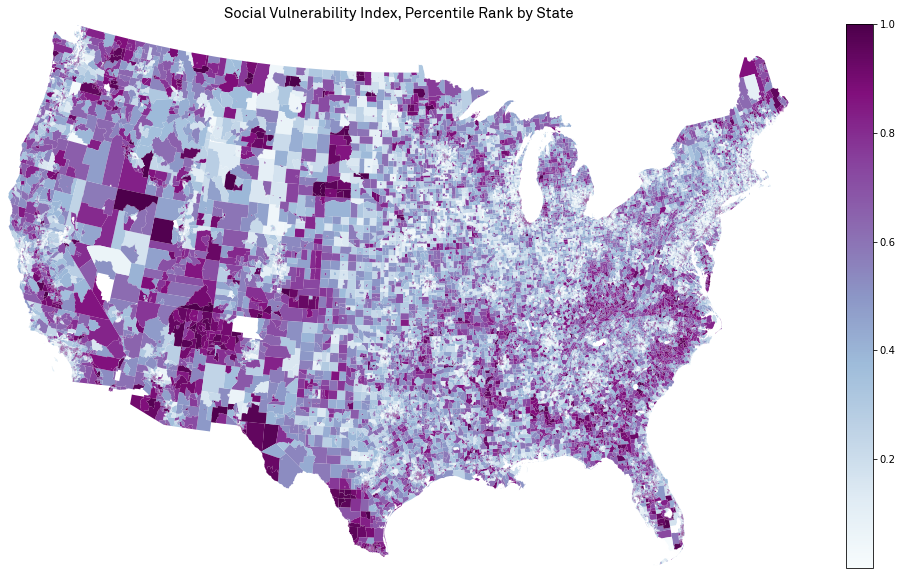

In [55]:
## for plotting -- reprojecting to albers usa
svi_states_albers = svi_states.to_crs("ESRI:102008")

fig, ax = plt.subplots(figsize=(20,10))
svi_states_albers.plot(ax=ax, column='RPL_ThemesStates', legend=True,cmap="BuPu")
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()


#### Population Without Health Insurance USA as a whole

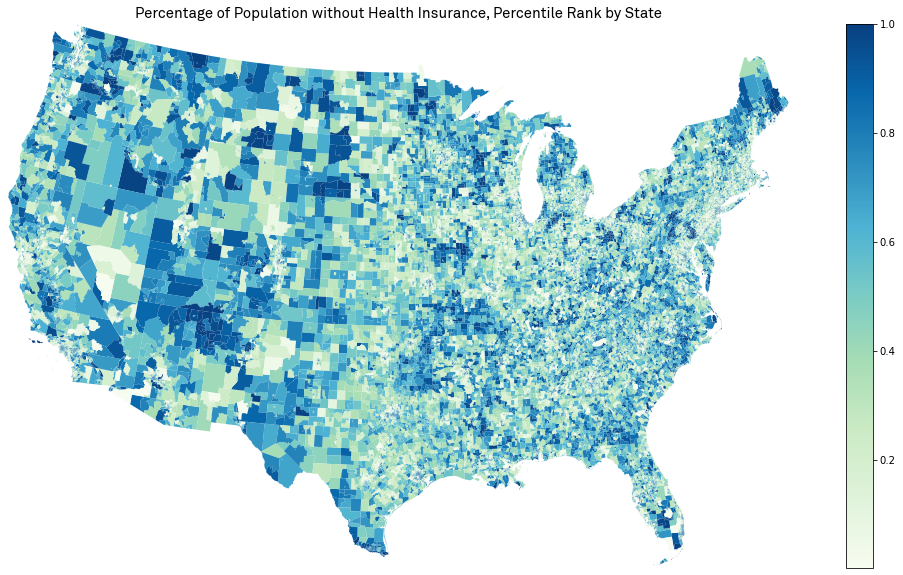

In [201]:
svi_states_albers['PER_UNINSUR'] = svi_states_albers.groupby('STATE')['EP_UNINSUR'].rank(pct=True)
fig, ax = plt.subplots(figsize=(20,10))
svi_states_albers.plot(ax=ax, column='PER_UNINSUR', legend=True,cmap="GnBu")
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title("Percentage of Population without Health Insurance, Percentile Rank by State", 
             fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

#### Connecticut

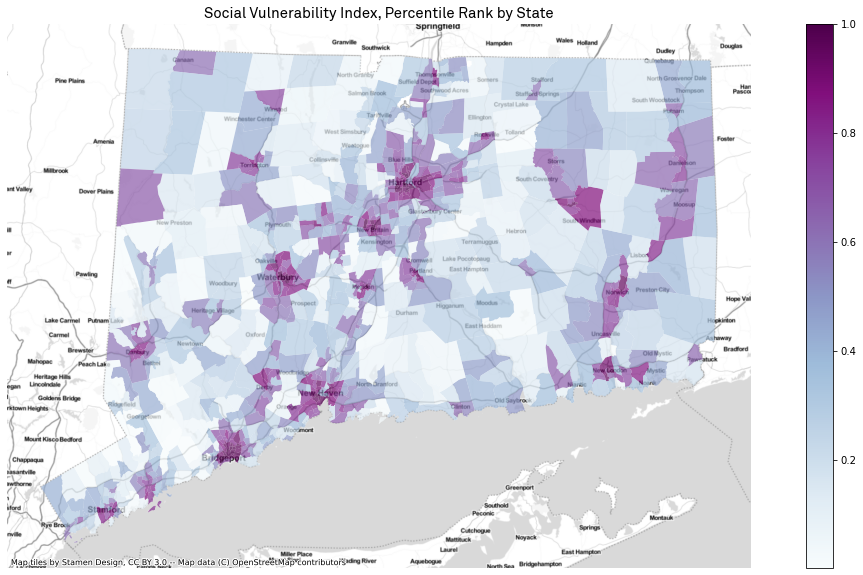

In [202]:
## creating a new haven filter 
# ct = lower_counties[lower_counties['STATEFP'] == '09']
# ct = ct.to_crs('EPSG:2234')

## subsetting just connecticut data:
ct_svi = svi_states[svi_states['ST']=='09']
ct_svi = ct_svi.to_crs('EPSG:2234')

fig, ax = plt.subplots(figsize=(20,10))
ct_svi.plot(ax=ax, column='RPL_ThemesStates',legend=True,cmap="BuPu",alpha=.7)
ctx.add_basemap(ax, crs=ct.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

#### New Haven

In [203]:
# setting bounding box Hew Haven county 
nh_xlim = ([ct_svi[ct_svi['STCNTY']=='09009'].total_bounds[0],
 ct_svi[ct_svi['STCNTY']=='09009'].total_bounds[2]])
nh_ylim = ([ct_svi[ct_svi['STCNTY']=='09009'].total_bounds[1],
 ct_svi[ct_svi['STCNTY']=='09009'].total_bounds[3]])

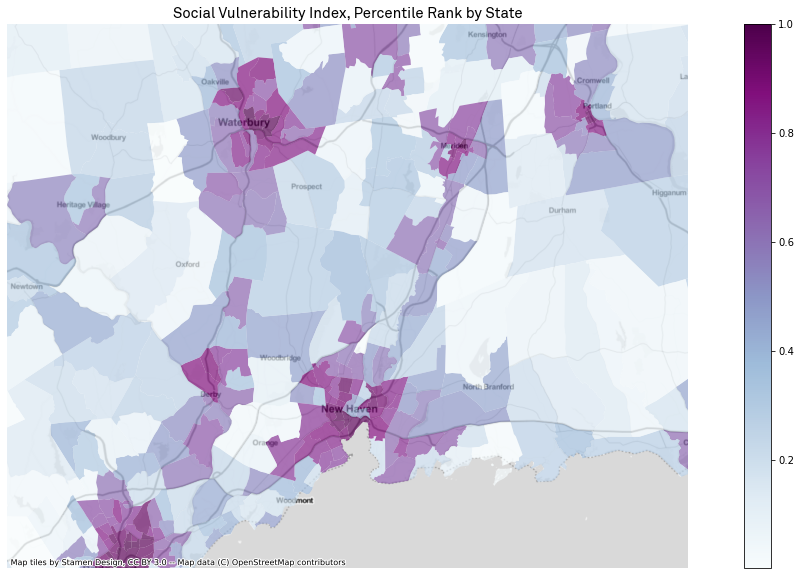

In [204]:
fig, ax = plt.subplots(figsize=(20,10))
ct_svi.plot(ax=ax, column='RPL_ThemesStates',legend=True,cmap="BuPu",alpha=.7)
# ct.plot(ax=ax,alpha=0.5)
ax.set_xlim(nh_xlim)
ax.set_ylim(nh_ylim)
ctx.add_basemap(ax, crs=ct.crs.to_string(),
                source=ctx.providers.Stamen.TonerLite)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

#### New York City

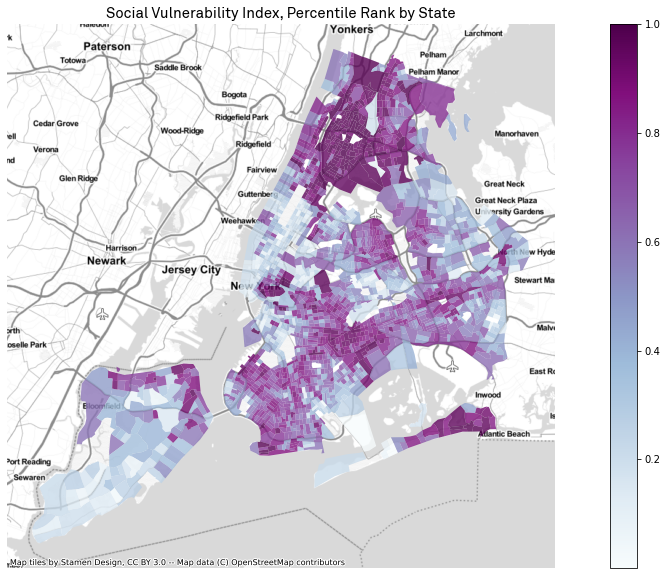

In [199]:
svi_states_webmercator = svi_states.to_crs("EPSG:3857")
fig, ax = plt.subplots(figsize=(20,10))

svi_states_webmercator[((svi_states_albers['STCNTY']=='36061')|
                   (svi_states_albers['STCNTY']=='36005')|
                   (svi_states_albers['STCNTY']=='36085')|
                   (svi_states_albers['STCNTY']=='36081')|
                  (svi_states_albers['STCNTY']=='36047'))].plot(ax=ax, 
                                                                column='RPL_ThemesStates',
                                                                legend=True,
                                                                cmap="BuPu",alpha=.8)
ctx.add_basemap(ax, crs=svi_states_webmercator.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

# next steps

- develop method for categorizing 'essential workers' from ACS occupations
- develop method for categorizing 'high proximity jobs' from ACS occupations (based on Mongey paper)
- compile a revised SVI with work + insurance added

- decide on COVID source data
- compare SVI with COVID data

- learn how tribal lands are treated in the SVI data (see map below)

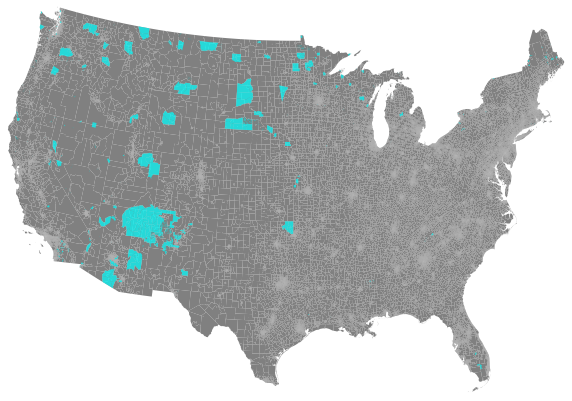

In [200]:
# Tribal lands in CDC SVI dataset
svi_tribal_albers = svi_tribal.to_crs("ESRI:102008")
fig, ax = plt.subplots(figsize=(10,10))
svi_states_albers.plot(ax=ax,color = "grey")
svi_tribal_albers.plot(ax=ax,color="cyan",alpha=0.7)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_axis_off()